In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from scipy import stats

In [2]:
url = "https://raw.githubusercontent.com/allansantos881/Iblue-desafio-tecnico/refs/heads/main/Car_Insurance_Claim.csv" # Subi o arquivo CSV do kaggle no github

In [3]:
df = pd.read_csv(url)

df.head() # Auditoria

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

,0
ID,0
AGE,0
GENDER,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,982
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0


Missing values

CREDIT_SCORE → 9018 (faltam 982)

ANNUAL_MILEAGE → 9043 (faltam 957)

Variáveis categóricas que estão como object

AGE

DRIVING_EXPERIENCE

INCOME

VEHICLE_YEAR

Provavelmente são categorias do tipo:

"16-25"

"26-39"

"10-19y"

"over 20y"
etc.

Variáveis binárias que estão como float

VEHICLE_OWNERSHIP

MARRIED

CHILDREN

OUTCOME

In [5]:
df.columns = df.columns.str.lower()
df.columns # padronizacao de dados

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

In [6]:
df['outcome'] = df['outcome'].astype(int)# Conversão de variáveis binarias para int

In [7]:
bin_cols = ['vehicle_ownership','married','children','outcome']
df[bin_cols] = df[bin_cols].astype(int) # Conversão de variáveis binarias para int

In [8]:
df['credit_score_missing'] = df['credit_score'].isnull().astype(int)
df['annual_mileage_missing'] = df['annual_mileage'].isnull().astype(int) # flags para marcar valores ausentes

In [9]:
missing = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

pd.DataFrame({
    'Missing': missing,
    'Percentual (%)': missing_percent
}).sort_values(by='Percentual (%)', ascending=False) # Auditoria de Valores Ausentes

,Missing,Percentual (%)
credit_score,982,9.82
annual_mileage,957,9.57
gender,0,0.00
age,0,0.00
id,0,0.00
driving_experience,0,0.00
race,0,0.00
income,0,0.00
education,0,0.00
vehicle_year,0,0.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   age                     10000 non-null  object 
 2   gender                  10000 non-null  object 
 3   race                    10000 non-null  object 
 4   driving_experience      10000 non-null  object 
 5   education               10000 non-null  object 
 6   income                  10000 non-null  object 
 7   credit_score            9018 non-null   float64
 8   vehicle_ownership       10000 non-null  int64  
 9   vehicle_year            10000 non-null  object 
 10  married                 10000 non-null  int64  
 11  children                10000 non-null  int64  
 12  postal_code             10000 non-null  int64  
 13  annual_mileage          9043 non-null   float64
 14  vehicle_type            10000 non-null 

In [11]:
Q1 = df['annual_mileage'].quantile(0.25)
Q3 = df['annual_mileage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['annual_mileage'] < lower_bound) |
              (df['annual_mileage'] > upper_bound)]

len(outliers)

17

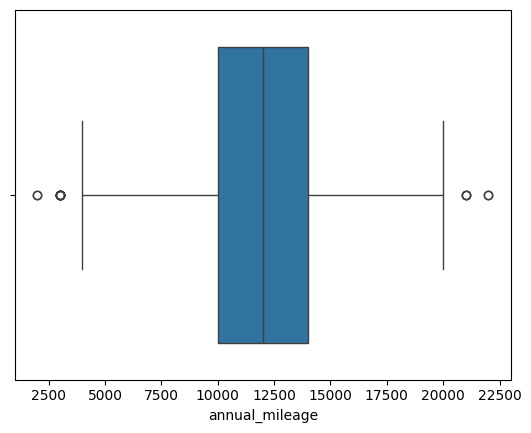

In [12]:
sns.boxplot(x=df['annual_mileage'])
plt.show()

In [13]:
z_scores = np.abs(stats.zscore(df['annual_mileage'].dropna()))
np.where(z_scores > 3)

(array([1426, 1437, 2358, 3362, 3501, 3982, 3997, 4314, 4498, 4529, 4652,
        5492, 6483, 6610, 6628, 6815, 8214]),)

Identifiquei 17 observações com Z-score acima de 3, mas os valores estavam dentro de um intervalo plausível de uso anual de veículo. Como não representam erro de dado, optei por mantê-los para preservar variabilidade real de risco.

In [14]:
total_clientes = df.shape[0]
total_sinistros = df['outcome'].sum()
taxa_sinistro = df['outcome'].mean()

print(f"Total de clientes: {total_clientes}")
print(f"Total de sinistros: {int(total_sinistros)}")
print(f"Taxa de sinistro: {taxa_sinistro:.2%}")

Total de clientes: 10000
Total de sinistros: 3133
Taxa de sinistro: 31.33%


In [15]:
df['outcome'].value_counts(normalize=True) * 100 #verificando taxa geral de sinistro

,proportion
outcome,
0,68.67
1,31.33


A taxa geral de sinistro é de 31,3%, indicando que aproximadamente 1 a cada 3 clientes registrou sinistro.
Esse patamar sugere risco relevante na carteira e abre espaço para segmentação por perfil para estratégias de precificação e underwriting mais precisas.

In [16]:
df.groupby('age')['outcome'].mean().sort_values(ascending=False) #verificando risco por faixa etaria

,outcome
age,
16-25,0.718254
26-39,0.336925
40-64,0.155919
65+,0.098492


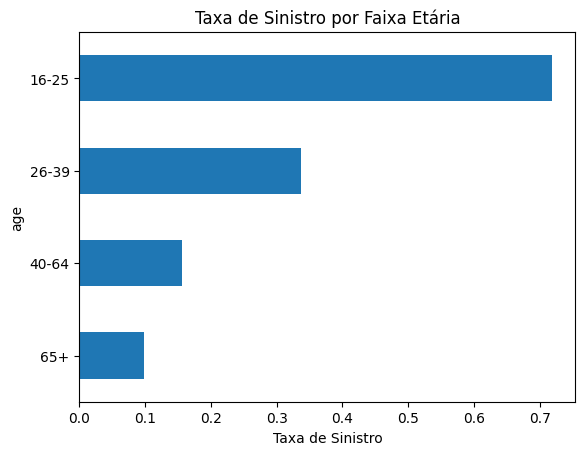

In [17]:
age_risk = df.groupby('age')['outcome'].mean().sort_values()

age_risk.plot(kind='barh')
plt.title('Taxa de Sinistro por Faixa Etária')
plt.xlabel('Taxa de Sinistro')
plt.show() #criando grafico com matpotlib

# Idade como principal driver de risco

A faixa 16–25 anos apresenta taxa de sinistro significativamente superior (≈72%) quando comparada às demais faixas etárias.

Isso sugere que idade é um forte preditor de risco, justificando políticas diferenciadas de precificação e underwriting para clientes mais jovens.


In [18]:
df.groupby('driving_experience')['outcome'].mean().sort_values(ascending=False) * 100 #verificando tempo de experiencia dos motoristas

,outcome
driving_experience,
0-9y,62.804533
10-19y,23.855714
20-29y,5.143936
30y+,1.901141


# Experiência como principal preditor de risco

Motoristas com até 9 anos de experiência apresentam taxa de sinistro de 62,8%, enquanto aqueles com mais de 30 anos apresentam apenas 1,9%.

A diferença de risco relativo é superior a 30x, indicando que experiência é o principal driver de risco da carteira.


In [19]:
df.groupby('past_accidents')['outcome'].mean().sort_values(ascending=False) * 100 #verificando historico de acidentes

,outcome
past_accidents,
0,46.973496
1,15.030847
2,12.952899
3,8.513932
4,7.377049
6,4.166667
5,3.879310
7,3.278689
8,0.000000


In [20]:
df['past_accidents'].value_counts() #confirmando a informacao acima

,count
past_accidents,
0,5584
1,1783
2,1104
3,646
4,366
5,232
6,144
7,61
8,41


# Clientes sem acidentes prévios apresentam taxa de sinistro significativamente maior

(46,9%) do que aqueles com múltiplos acidentes anteriores.

Isso indica que histórico isolado pode não ser um bom preditor linear de risco e deve ser analisado em conjunto com experiência e idade.

In [21]:
pd.pivot_table(
    df,
    values='outcome',
    index='driving_experience',
    columns='past_accidents',
    aggfunc='mean'
) # tabela dinâmica (pivot table) que mostra a taxa média de sinistro combinando duas variáveis

past_accidents,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
driving_experience,,,,,,,,,,,,,,,
0-9y,0.628045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-19y,0.259958,0.223070,0.221344,0.213198,0.217949,0.222222,0.300000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-29y,0.057732,0.050633,0.069712,0.036101,0.054545,0.018018,0.030303,0.030303,0.0,0.0,NaN,NaN,NaN,NaN,NaN
30y+,0.043478,0.033149,0.010989,0.017442,0.008130,0.010638,0.014706,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Experiência domina histórico de acidentes

A análise cruzada entre experiência e acidentes passados indica que experiência é o principal fator determinante de risco.

Motoristas com até 9 anos de experiência mantêm alta taxa de sinistro (~63%) independentemente do histórico.

Por outro lado, motoristas com 30+ anos apresentam taxa inferior a 5%, mesmo com acidentes prévios.

Isso sugere que políticas de precificação devem priorizar experiência como principal variável de risco.


In [22]:
df.groupby('credit_score')['outcome'].mean() #score de credito

,outcome
credit_score,
0.053358,1.0
0.060867,1.0
0.064810,0.0
0.095387,1.0
0.097211,1.0
...,...
0.884410,0.0
0.896299,0.0
0.914117,0.0


In [23]:
df['credit_score'].describe()

,credit_score
count,9018.000000
mean,0.515813
std,0.137688
min,0.053358
25%,0.417191
50%,0.525033
75%,0.618312
max,0.960819


In [24]:
df['score_bucket'] = pd.qcut(df['credit_score'], 4)

df.groupby('score_bucket')['outcome'].mean() #transformou uma variável contínua em 4 faixas com tamanhos equilibrados

/tmp/ipython-input-1034042213.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('score_bucket')['outcome'].mean() #transformou uma variável contínua em 4 faixas com tamanhos equilibrados


,outcome
score_bucket,
"(0.0524, 0.417]",0.545455
"(0.417, 0.525]",0.347382
"(0.525, 0.618]",0.210293
"(0.618, 0.961]",0.151663


# Crédito como indicador relevante de risco

Observa-se clara relação monotônica entre score de crédito e taxa de sinistro.

Clientes no quartil inferior apresentam taxa de 54,5%, enquanto no quartil superior a taxa cai para 15,2%.

O score demonstra forte poder preditivo e deve ser considerado como variável central na precificação.


In [25]:
df.groupby('speeding_violations')['outcome'].mean().sort_index() # verificando historico de multas

,outcome
speeding_violations,
0,0.491647
1,0.158031
2,0.170543
3,0.108434
4,0.109434
5,0.084639
6,0.085106
7,0.050000
8,0.133333


In [26]:
df['speeding_violations'].value_counts() # confirmando informacao

,count
speeding_violations,
0,5028
1,1544
2,1161
3,830
4,530
5,319
6,188
7,140
8,75


# Clientes sem histórico de multas apresentam taxa de sinistro significativamente maior

(49%) do que aqueles com múltiplas infrações.

Isso indica que multas isoladamente não explicam risco e devem ser analisadas em conjunto com experiência e idade.

In [27]:
df['annual_mileage'].describe()

,annual_mileage
count,9043.000000
mean,11697.003207
std,2818.434528
min,2000.000000
25%,10000.000000
50%,12000.000000
75%,14000.000000
max,22000.000000


In [28]:
df['mileage_bucket'] = pd.qcut(df['annual_mileage'], 4)

df.groupby('mileage_bucket')['outcome'].mean() #transformou uma variável contínua em 4 faixas com tamanhos equilibrados

/tmp/ipython-input-1592149959.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('mileage_bucket')['outcome'].mean() #transformou uma variável contínua em 4 faixas com tamanhos equilibrados


,outcome
mileage_bucket,
"(1999.999, 10000.0]",0.226667
"(10000.0, 12000.0]",0.281667
"(12000.0, 14000.0]",0.355982
"(14000.0, 22000.0]",0.473397


# Quilometragem como indicador de exposição ao risco

Há clara relação entre quilometragem anual e taxa de sinistro.

Clientes no quartil superior (>14k milhas/ano) apresentam taxa de 47,3%, enquanto no quartil inferior a taxa é 22,7%.

Isso indica que exposição ao risco é fator relevante e deve ser incorporado na precificação.
